# Title: Gender Disparities in Heart Disease Risk Factors and Prevalence: Exploring the Impact of Key Predictive Variables

### INTRODUCTION

Heart disease is a significant global health concern affecting both men and women. Gender differences exist in the prevalence, risk factors, and manifestations of heart disease. Understanding these gender-specific aspects is crucial for effective prevention and treatment strategies. Factors such as cholesterol levels, age, blood pressure, electrocardiographic results, maximum heart rate achieved, and sex can contribute to heart disease development. By analyzing these key predictive variables, including their relationship with different genders, we aim to identify which gender is more affected by heart disease. This research will contribute to our knowledge of gender-specific factors influencing heart disease and facilitate the development of targeted interventions for improved cardiovascular health.

In this project, our main question revolves around determining which gender is more likely to develop heart disease based on potential contributing factors, " Which gender has more chance to get heart disease by considering the features that might cause the heart disease?". To answer this question, we will analyze various variables that are known to be associated with heart disease. By examining these variables, we aim to identify any disparities between males and females in terms of their susceptibility to heart disease. We will explore the relationship between gender and these contributing factors, seeking to understand which gender exhibits a higher risk for developing heart disease. By conducting a thorough analysis, we hope to shed light on the gender-specific aspects of heart disease and contribute to a better understanding of this health issue.

To answer our question, we will consider several useful variables that impact CP. These variables include cholesterol levels, age, resting blood pressure, resting electrocardiographic results, maximum heart rate achieved, and sex (color). By examining these factors, we can gain insights into the cardiovascular performance and better understand its relationship with these variables. 

For the preliminary exploratory data analysis, we will demonstrate that the dataset can be read from the web into R. We will organize the data into a single table with multiple columns. We will also clean and wrangle the data to ensure it is in a tidy format, making visualization easy. We will then explore the dataset using summary statistics, visualizations, and statistical tests. Our aim is to identify relationships between variables and understand the distribution of the target variable. To facilitate understanding, we color-label certain variables. Additionally, we will compare age and sex with multiple variables within the dataset, utilizing various plots to demonstrate specific relationships between them.

### METHODS & RESULTS

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(gridExtra)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Methods:** 

0. `Read` the data by the `URL` and `select` the columns:

     * `id`
     * `age`
     * `sex`
     * `cp`
     * `trestbps`
     * `chol`
     * `restecg`
     * `thalach`


1. Find each gender’s most chest pain type by selecting `sex` and `chest pain` type `typical angina`, `atypical angina`, `non-anginal`, `asymptomatic` columns. Then we will create a `scatter graph` and `color` males and females differently.

2. We are comparing each gender by cholesterol and finding which gender has a higher cholesterol rate. We are going to `select` `sex` and serum `cholesterol` columns. Then we are going to `mutate` the data and find the `average chol rate` for each `sex`. Then create the bar graph of `sex` against `average chol rate` and `color` `males` and `females` differently.

3. We are comparing each gender by resting blood pressure and finding which gender has a higher resting blood pressure rate. We are going to `select` the `sex` and `resting blood pressure(trestbps)` columns. Then we are going to `mutate` the data and find the `average resting blood pressure(trestbps) rate` for each `sex`.

4. Find each gender’s most `resting electrocardiographic results` by `selecting` `sex`, and `restecg` columns. Then we are going to create a `bar` graph and `color` `males` and `females` differently.

5. Comparing each gender by `maximum heart rate achieved` and finding which gender has `higher maximum heart rate achieved`. We are going to select `sex`, and `thalach` columns. Then we are going to `mutate` the data and find the `average thalach rate` for each `sex`. Then create the `bar` graph of `sex` against `average thalach rate` and `colour` `males` and `females` differently.


6. Finally, combine all features against gender together and see what results we get.


We have selected specific variables for our research because they are interrelated and provide sufficient information to address our research question. The variables we have chosen hold significant relevance in predicting heart conditions and assessing the risk of heart disease. Cholesterol levels play a crucial role as they indicate the presence of fatty deposits in blood vessels. Higher cholesterol levels are a strong indication of potential heart issues. Age is also an important variable since the risk of heart disease generally increases as individuals grow older. To ensure the accuracy of our predictions, we must consider resting blood pressure as a variable. High resting blood pressure is a major risk factor for heart disease and can help identify individuals prone to developing such conditions. Resting electrocardiographic data is another key factor in determining the risk of heart disease. Research conducted by Kaolawanich, Y., Thongsongsang, R., and Songsangjinda, T. has shown that abnormal resting electrocardiographic cardiogram readings are strong predictors of mortality and major adverse cardiac events. To enhance the reliability of our predictions, we have included the variable of maximum heart rate. Studies have demonstrated that a 10-beat per minute increase in heart rate is associated with a minimum 20% rise in the risk of cardiac death. Therefore, maximum heart rate is of utmost importance in determining gender-specific risk based on these variables.

**Results:**

In [74]:
# Method_0
heart_disease <-read_csv("https://raw.githubusercontent.com/raulortiz04/dsci-100-2023s1-group-59/main/heart_disease_uci.csv")

heart_disease <- heart_disease |>
    select(-num, -thal, -slope, -dataset, -oldpeak, -exang, -ca, -fbs) |> # remove columns that is not important
    na.omit() # remove NAs
heart_disease

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,sex,cp,trestbps,chol,restecg,thalch
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,63,Male,typical angina,145,233,lv hypertrophy,150
2,67,Male,asymptomatic,160,286,lv hypertrophy,108
3,67,Male,asymptomatic,120,229,lv hypertrophy,129
4,37,Male,non-anginal,130,250,normal,187
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
915,46,Male,asymptomatic,134,310,normal,126
916,54,Female,asymptomatic,127,333,st-t abnormality,154
918,55,Male,asymptomatic,122,223,st-t abnormality,100
920,62,Male,atypical angina,120,254,lv hypertrophy,93


`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,cp,count
<chr>,<chr>,<int>
Female,asymptomatic,70
Female,atypical angina,54
Female,non-anginal,51
Female,typical angina,10
Male,asymptomatic,386
Male,atypical angina,103
Male,non-anginal,127
Male,typical angina,31


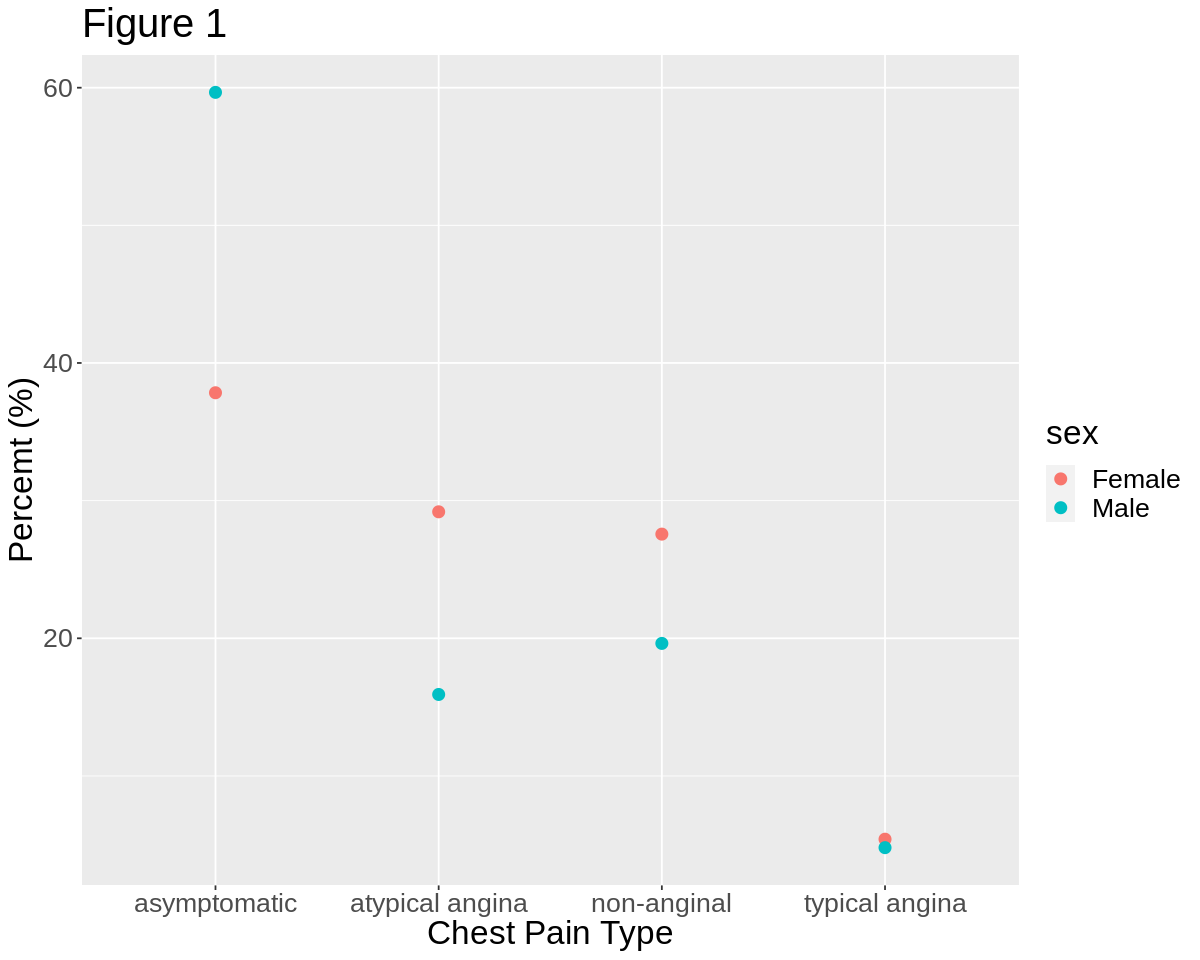

In [94]:
# Method_1

# Number of Female & Male
sex_dist <- heart_disease |>
  group_by(sex, cp) |>
  summarize(count = n())
sex_dist
# Percentate of Female & Male
sex_dist_perc <- sex_dist |>
  mutate(percent = count / sum(count) * 100)

# Plot of the sex_dist_perc
options(repr.plot.width = 10, repr.plot.height = 8)
sex_dist_plot <- sex_dist_perc |>
    ggplot(aes(x = cp, y = percent, color = sex)) +
    geom_point(size = 3) +
    labs(x = "Chest Pain Type", y = "Percemt (%)") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 1")
sex_dist_plot

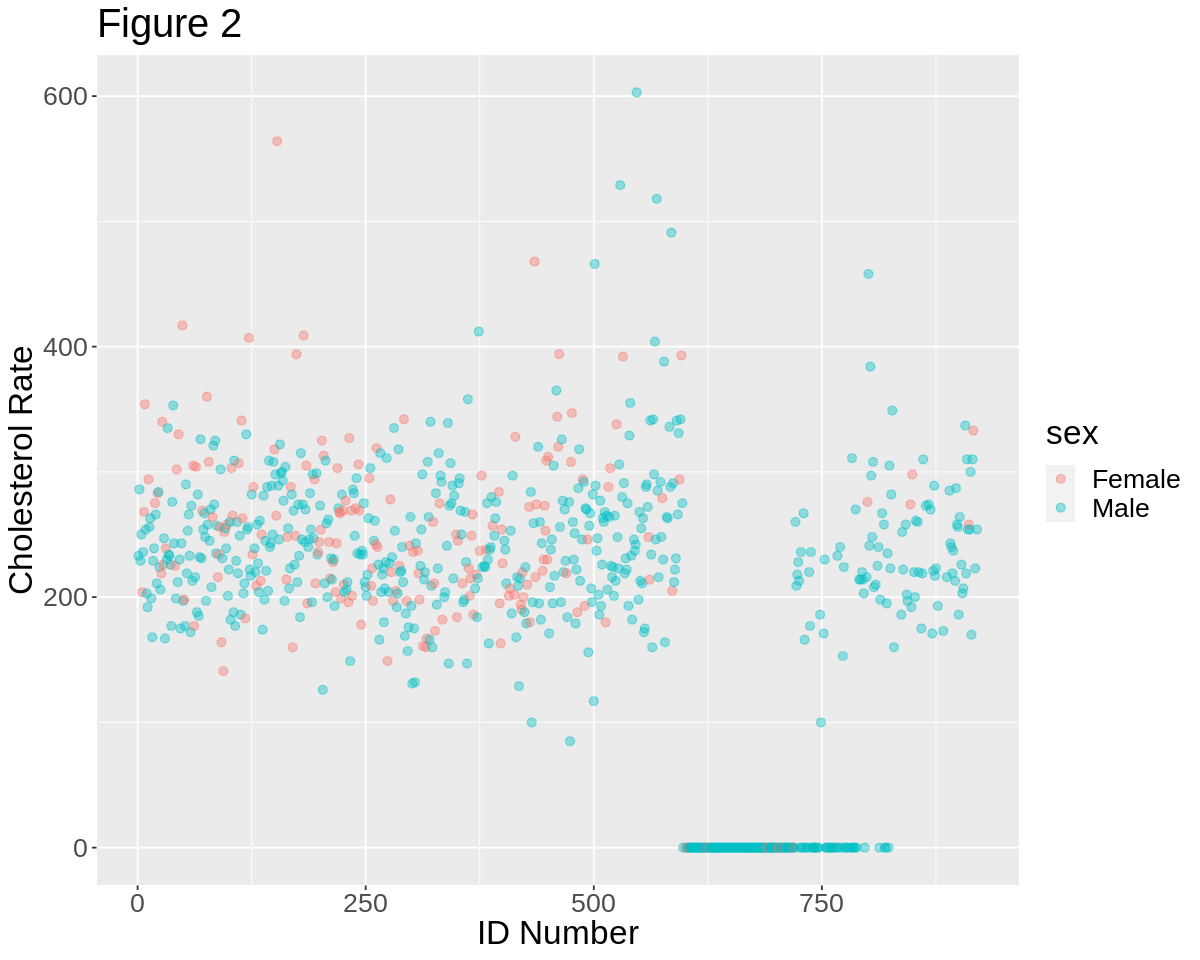

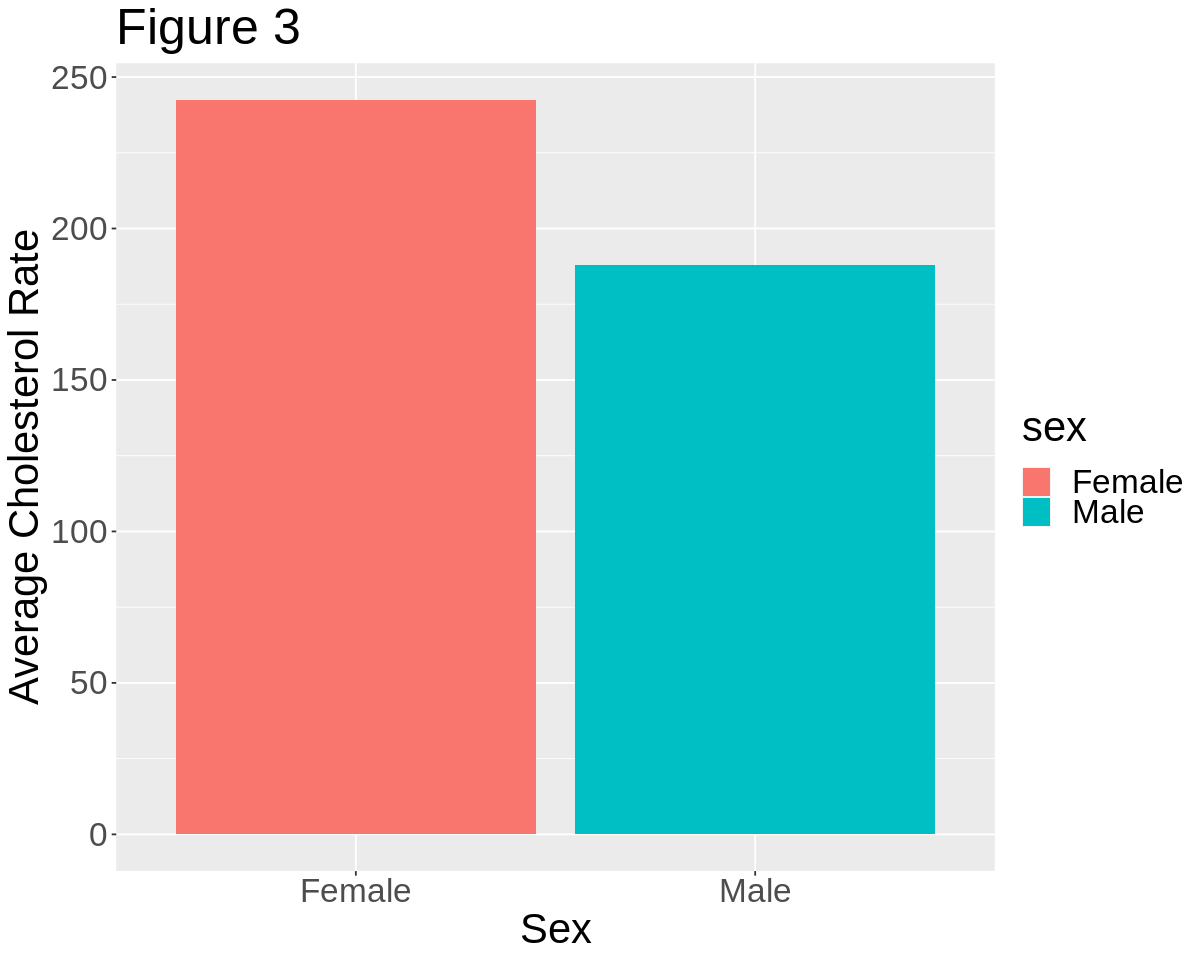

In [96]:
# Method_2

# Sex vs Chol rate
sex_chol <- heart_disease |>
    select(sex, chol, id)

# Sex vs Average Chol
sex_chol_avrg <- sex_chol |>
  group_by(sex) |>
  summarize(avg_chol = mean(chol))

# Plot of Sex vs Chol rate
sex_chol_plot <- sex_chol |>
    ggplot(aes(x = id, y = chol, color = sex)) +
    geom_point(alpha = 0.4, size = 2.2) +
    labs(x = "ID Number", y = "Cholesterol Rate") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 2")
sex_chol_plot

# Plot of sex_chol_avrg
sex_chol_avrg_plot <- ggplot(sex_chol_avrg, aes(x = sex, y = avg_chol, fill = sex)) +
    geom_bar(size = 0.5, stat = "identity") +
    labs(x = "Sex", y = "Average Cholesterol Rate") + 
    theme(text = element_text(size = 25)) +
    ggtitle("Figure 3")
sex_chol_avrg_plot


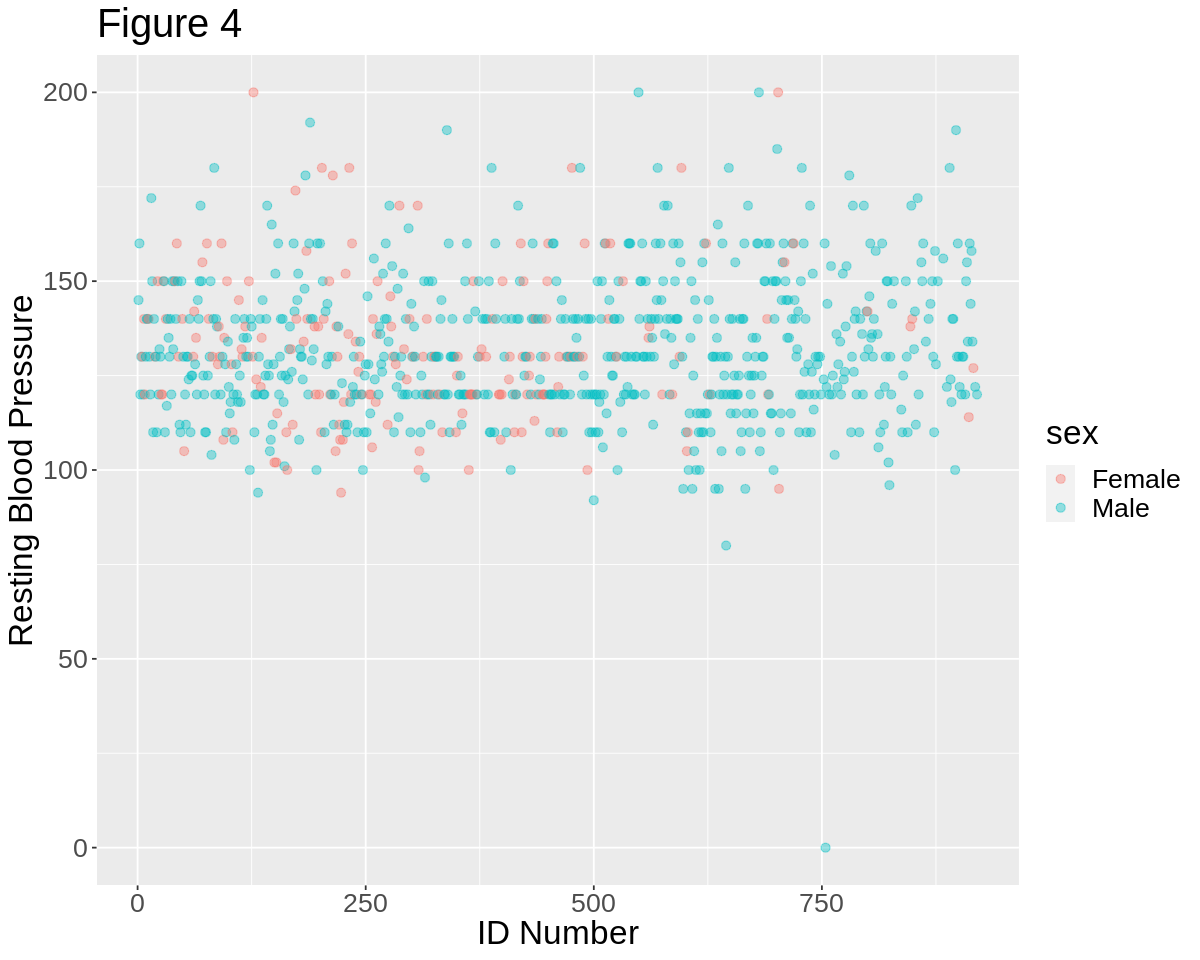

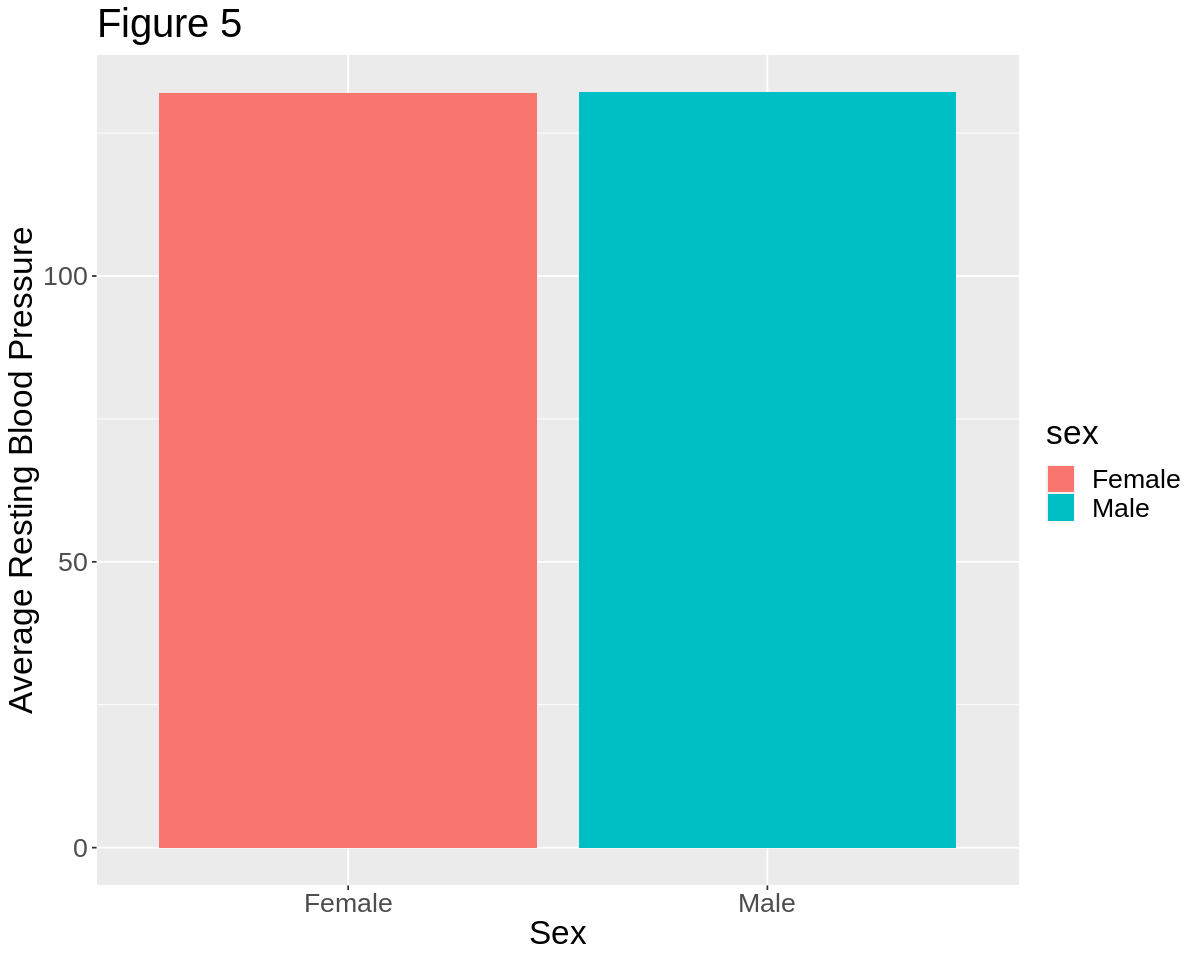

In [97]:
# Method_3

# Sex vs Resting Blood Pressure
sex_trestbps <- heart_disease |>
  select(sex, trestbps, id)

# Sex vs Average Resting Blood Pressure
sex_trestbps_avrg <- sex_trestbps |>
  group_by(sex) |>
  summarize(avg_trestbps = mean(trestbps, na.rm = TRUE))

# Plot of Sex vs trestbps rate
sex_chol_plot <- sex_trestbps |>
    ggplot(aes(x = id, y = trestbps, color = sex)) +
    geom_point(alpha = 0.4, size = 2.2) +
    labs(x = "ID Number", y = "Resting Blood Pressure") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 4")
sex_chol_plot

# Plot of Sex vs Average Resting Blood Pressure
sex_trestbps_plot <- ggplot(sex_trestbps_avrg, aes(x = sex, y = avg_trestbps, fill = sex)) +
    geom_bar(stat = "identity") +
    labs(x = "Sex", y = "Average Resting Blood Pressure") + 
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 5")
sex_trestbps_plot


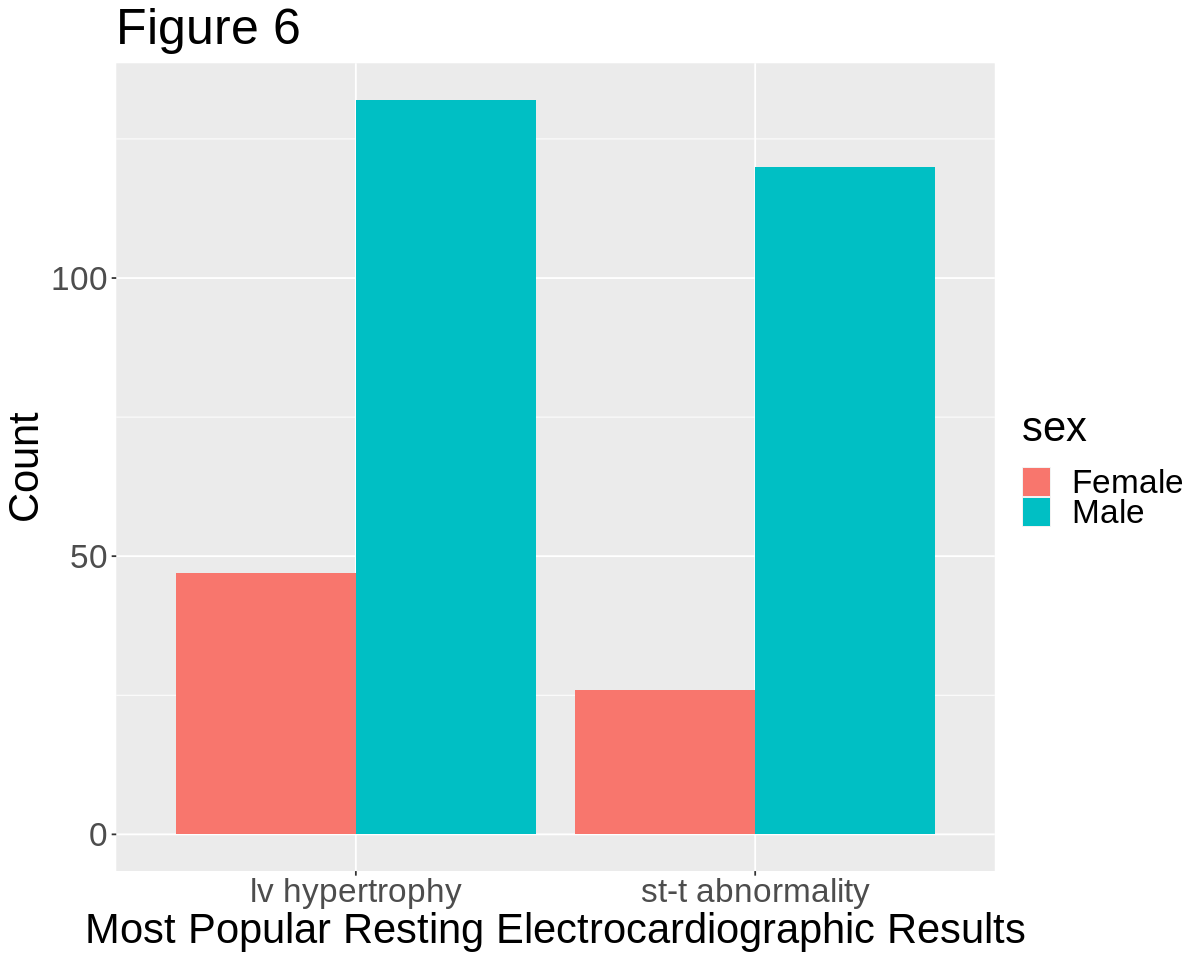

In [100]:
# Method_4

# Number of restecg
restecg_count <- heart_disease |>
 filter(restecg != "normal") |>
  group_by(sex, restecg) |>
  count()

# Plot of Sex vs Resting Electrocardiographic Results
restecg_count_plot <- ggplot(restecg_count, aes(x = restecg, y = n, fill = sex)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Most Popular Resting Electrocardiographic Results", y = "Count") + 
    theme(text = element_text(size = 25)) +
    ggtitle("Figure 6")
restecg_count_plot

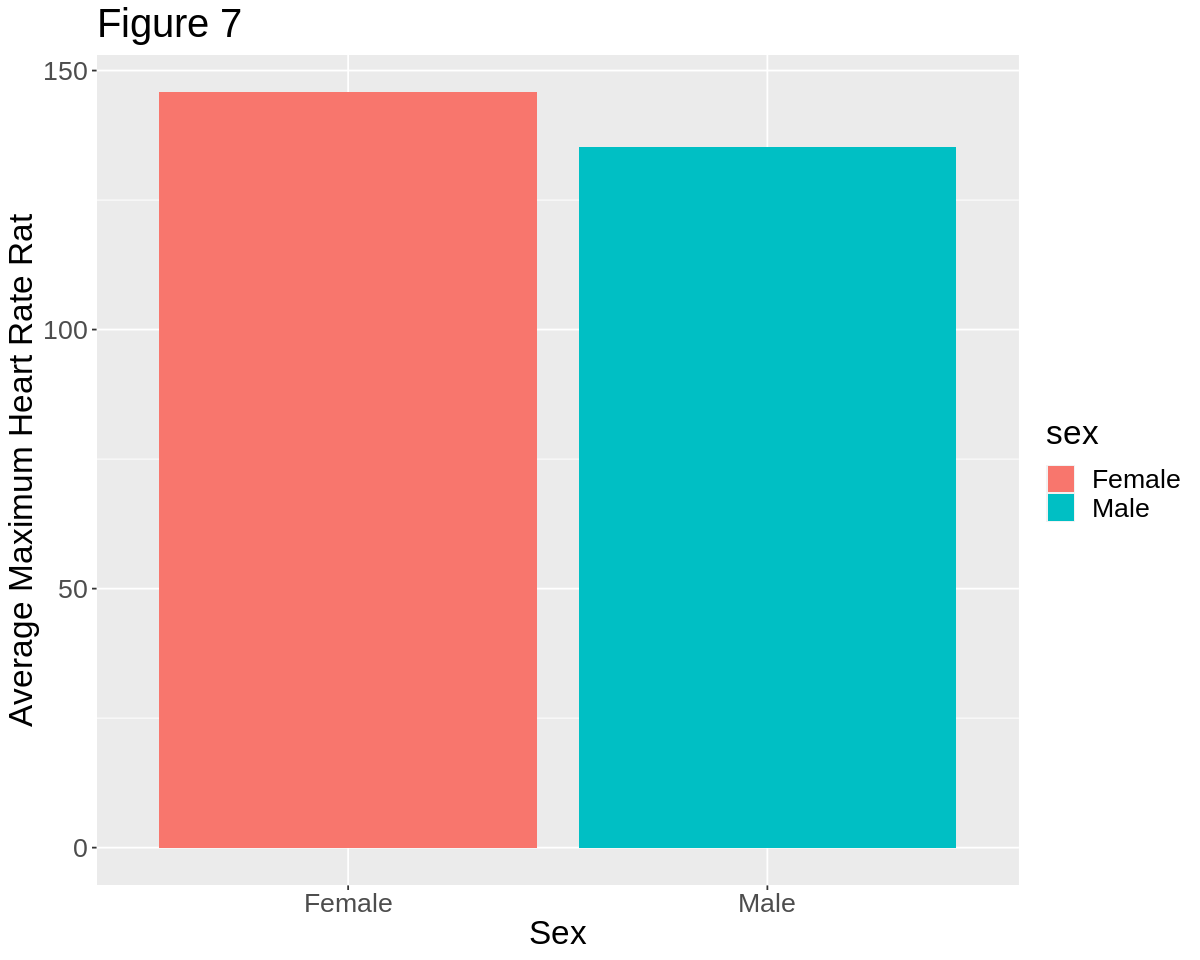

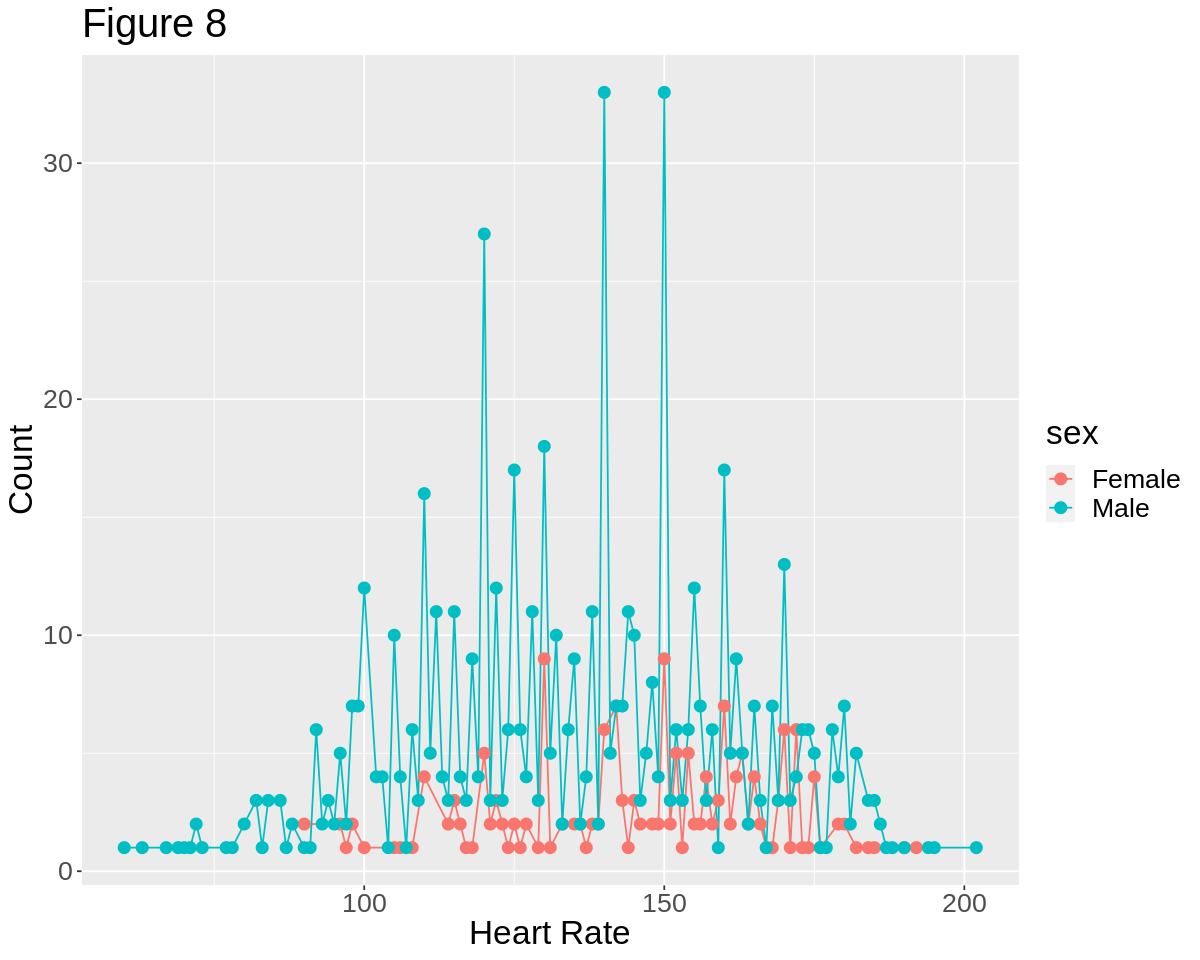

In [103]:
# Method_5

# Sex vs Average thalch
sex_thalch_avrg <- heart_disease |>
  group_by(sex) |>
  summarize(avg_thalch = mean(thalch))

# Plot of Sex vs Average thalch
sex_thalch_avrg_plot <- ggplot(sex_thalch_avrg, aes(x = sex, y = avg_thalch, fill = sex)) +
    geom_bar(stat = "identity") +
    labs(x = "Sex", y = "Average Maximum Heart Rate Rat") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 7")
sex_thalch_avrg_plot

# Sex vs Heart Rate
sex_heart_rate <- heart_disease |>
  group_by(sex, thalch) |>
  count()

# Plot of Sex vs Heart Rate
sex_heart_rate_plot <- ggplot(sex_heart_rate, aes(x = thalch, y = n, color = sex)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Heart Rate", y = "Count") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 8")
sex_heart_rate_plot

### DISCUSSION

In conclusion, when considering specific aspects of heart disease, there are some differences between males and females. Asymptomatic chest pain is reported more frequently in males than females, while atypical angina and non-anginal chest pain is reported more frequently in females. On average, females tend to have slightly higher cholesterol levels as well as resting blood pressure. Resting electrocardiographic results, which assess the electrical activity of the heart, showed that more males had problems with ST-T wave abnormality and left ventricular hypertrophy. Additionally, average maximum heart rate tends to be higher in females compared to males. These variations highlight the importance of considering gender-specific factors in the diagnosis, treatment, and management of heart disease. Some studies also show that young males are affected more than females but females after 45 years have a high risk of getting heart diseases. So, both gender have the risk of getting heart diseases and in our data analysis, the important predictors predict that females are more prone to heart disease than males.

We expected to find some differences between sexes as well as positive correlations between cholesterol, age, resting blood pressure, resting electrocardiographic results and heart disease (chest pain). We also expected to find a negative correlation between maximum heart rate achieved and heart disease as a maximum heart rate acheived indicates good health and is often something that decreases with age. We know that on average, females have a longer life expectancy than males, so females outperforming males on the important predictors of heart disease was what we were intuitively expecting to find.

Findings from our project show the relationship between certain factors and heart disease, as well as any gender differences. These findings can be used to take precautionary measures for one to score better on certain heart disease (chest pain) predictors, which may in turn reduce the risk of getting heart disease (chest pain).

This could lead to future questions regarding lifestyle choices and environmental factors which are responsible for contributing to heart disease. Questions can be asked about how one could reduce the factors impact on the probability of getting heart disease and to what extent you can prevent heart disease through lifestyle choices. Since we determined the important predictors to be max heart rate and resting blood pressure, we can focus on asking questions about how one can improve their metrics. This could also lead to the exploration of the famous question “nature vs nurture”, which in this context refers to the extent genetics vs environment impacts the likelihood of getting heart disease.

### REFERENCES

* Bots, Sophie H, et al. “Sex Differences in Coronary Heart Disease and Stroke Mortality: A Global Assessment of the Effect of Ageing between 1980 and 2010.” BMJ Global Health, 1 Mar. 2017, gh.bmj.com/content/2/2/e000298.

* “High Blood Pressure.” Heart and Stroke Foundation of Canada, www.heartandstroke.ca/heart-disease/risk-and-prevention/condition-risk-factors/high-blood-pressure#:~:text=High%20blood%20pressure%20is%20the,blood%20through%20the%20blood%20vessels. Accessed 22 June 2023.

* Kaolawanich, Yodying, et al. “Clinical Values of Resting Electrocardiography in Patients with Known or Suspected Chronic Coronary Artery Disease: A Stress Perfusion Cardiac MRI Study - BMC Cardiovascular Disorders.” BioMed Central, 28 Dec. 2021, bmccardiovascdisord.biomedcentral.com/articles/10.1186/s12872-021-02440-5#:~:text=Resting%20ECG%20abnormality%20has%20been,populations%20%5B10%2C%2011%5D. “Know Your Risk for Heart Disease.” Centers for Disease Control and Prevention, 21 Mar. 2023, www.cdc.gov/heartdisease/risk_factors.htm.

* Mayo Clinic. “High Cholesterol.” Mayo Clinic, 11 Jan. 2023, www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=With%20high%20cholesterol%2C%20you%20can,a%20heart%20attack%20or%20stroke.

* Perret-Guillaume, Christine et al. “Heart rate as a risk factor for cardiovascular disease.” Progress in cardiovascular diseases vol. 52,1 (2009): 6-10. doi:10.1016/j.pcad.2009.05.003

* Gender differences in coronary heart disease. (n.d.). Retrieved June 24, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3018605/